In [8]:
import pandas as pd
import numpy as np
data = pd.read_csv('dataset.csv') 
print(data.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3          NaN     NaN  
4       3450.0  female  


In [9]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64


In [10]:
# Display basic stats and identify anomalies
print("Dataset Info:\n")
data.info()
print("Summary Statistics:\n", data.describe())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
Summary Statistics:
        bill_length_mm  bill_depth_mm  flipper_length_mm   body_mass_g
count      337.000000     342.000000         342.000000    342.000000
mean        43.876855      17.151170         200.915205   4273.976608
std          5.478600       1.974793          14.061714   1119.229602
min         32.100000      13.100000         172.000000   2700.000000
25%         39.200000    

In [11]:
# Fill missing numerical values with mean
for column in data.select_dtypes(include=np.number):
    data[column].fillna(data[column].mean(), inplace=True)

In [12]:
# For categorical data, replace missing values with mode
for column in data.select_dtypes(include='object'):
    data[column].fillna(data[column].mode()[0], inplace=True)


In [13]:
# Check for cleaned data
print("Cleaned Dataset:\n", data.head())

Cleaned Dataset:
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       39.100000       18.70000         181.000000   
1  Adelie  Torgersen       39.500000       17.40000         186.000000   
2  Adelie  Torgersen       40.300000       18.00000         195.000000   
3  Adelie  Torgersen       43.876855       17.15117         200.915205   
4  Adelie  Torgersen       36.700000       19.30000         193.000000   

   body_mass_g     sex  
0  3750.000000    male  
1  3800.000000  female  
2  3250.000000  female  
3  4273.976608    male  
4  3450.000000  female  


In [14]:
# Filter Gentoo penguins and calculate average body_mass_g
gentoo_avg_body_mass = data[data['species'] == 'Gentoo']['body_mass_g'].mean()
print("Average body_mass_g for Gentoo penguins:", gentoo_avg_body_mass)


Average body_mass_g for Gentoo penguins: 5126.806262969251


In [15]:
from scipy.stats import skew, kurtosis

# Group by species and calculate skewness and kurtosis
for species in data['species'].unique():
    species_data = data[data['species'] == species]
    for feature in ['bill_length_mm', 'bill_depth_mm']:
        feature_skew = skew(species_data[feature].dropna())
        feature_kurtosis = kurtosis(species_data[feature].dropna())
        print(f"{species} - {feature}: Skewness={feature_skew}, Kurtosis={feature_kurtosis}")


Adelie - bill_length_mm: Skewness=0.16253332755263714, Kurtosis=-0.22810386996708898
Adelie - bill_depth_mm: Skewness=0.32920948782263165, Kurtosis=-0.1010716144438013
Gentoo - bill_length_mm: Skewness=0.7123229012050303, Kurtosis=1.1476469434705532
Gentoo - bill_depth_mm: Skewness=0.3346225027387713, Kurtosis=-0.6111262891198335
Chinstrap - bill_length_mm: Skewness=-0.09593592588668304, Kurtosis=-0.12401146170151378
Chinstrap - bill_depth_mm: Skewness=0.0067259608078862046, Kurtosis=-0.898739653084359


C:\Users\xyz45\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


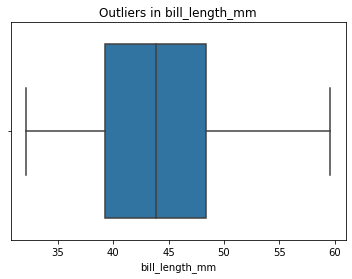

C:\Users\xyz45\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


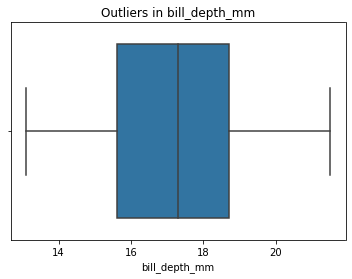

C:\Users\xyz45\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


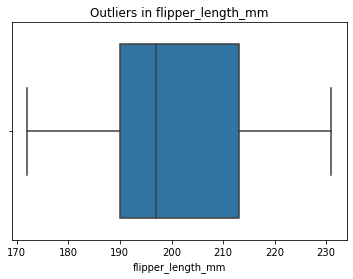

C:\Users\xyz45\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


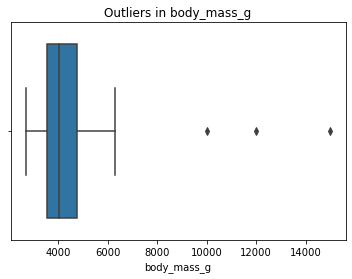

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to detect outliers using the IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Detect outliers for all numerical features
numerical_columns = data.select_dtypes(include=np.number)
outliers = {col: detect_outliers(data[col]) for col in numerical_columns}

# Visualize outliers
for col in outliers:
    sns.boxplot(data[col])
    plt.title(f'Outliers in {col}')
    plt.show()


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_columns)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
pca_result = pca.fit_transform(scaled_data)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Reduced Dimensions:", pca.n_components_)


Explained Variance Ratio: [0.6170052  0.19742404 0.13247262 0.05309814]
Reduced Dimensions: 4


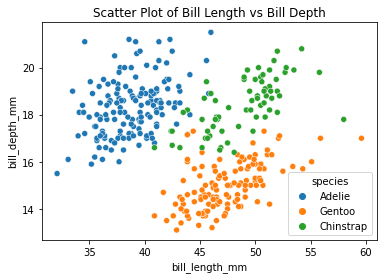

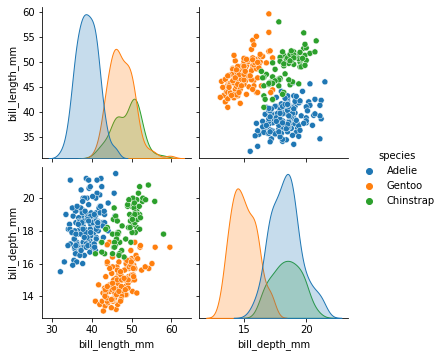

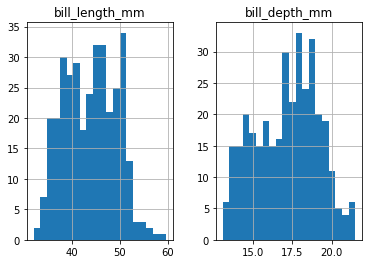

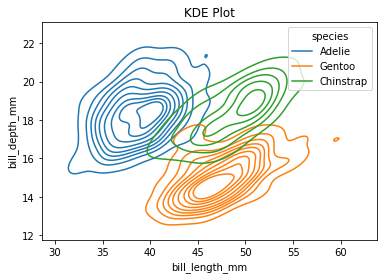

In [18]:
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=data)
plt.title("Scatter Plot of Bill Length vs Bill Depth")
plt.show()

# Pairplot
sns.pairplot(data, hue="species", vars=["bill_length_mm", "bill_depth_mm"])
plt.show()

# Histogram
data[['bill_length_mm', 'bill_depth_mm']].hist(bins=20)
plt.show()

# KDE plot
sns.kdeplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title("KDE Plot")
plt.show()


In [19]:
# Group by species and island, then find max flipper_length_mm
max_flipper = data.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
print("Maximum Flipper Length:\n", max_flipper)


Maximum Flipper Length:
      species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0


In [20]:
from scipy.stats import zscore

# Apply z-score normalization to numerical columns
data_normalized = data.copy()
for col in numerical_columns:
    data_normalized[col] = zscore(data[col])

print("Z-Score Normalized Dataset:\n", data_normalized.head())


Z-Score Normalized Dataset:
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen   -8.822304e-01   7.877425e-01          -1.422488   
1  Adelie  Torgersen   -8.083550e-01   1.265563e-01          -1.065352   
2  Adelie  Torgersen   -6.606041e-01   4.317192e-01          -0.422507   
3  Adelie  Torgersen    3.936873e-15   3.613854e-15           0.000000   
4  Adelie  Torgersen   -1.325483e+00   1.092905e+00          -0.565361   

   body_mass_g     sex  
0    -0.470213    male  
1    -0.425343  female  
2    -0.918910  female  
3     0.000000    male  
4    -0.739431  female  
